In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)
X_train.shape

(60000, 28, 28)

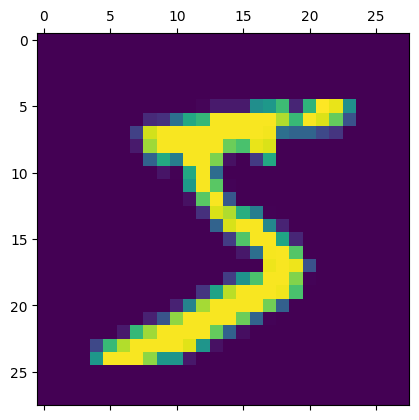

In [4]:
plt.matshow(X_train[0])

In [5]:
#reshape inputs to be 784*1 instead of 28*28 so can be fed into neural net
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [6]:
X_train_flat.shape

(60000, 784)

In [7]:
#scale inputs to be values ranging [0,1] instead of [0,255]
X_train_fs = X_train_flat / 255
X_test_fs = X_test_flat / 255

In [8]:
model = keras.Sequential([
	keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

model.fit(X_train_fs, Y_train, epochs=5)

Epoch 1/5
 132/1875 [=>............................] - ETA: 0s - loss: 1.3239 - accuracy: 0.6501  

2022-09-18 12:30:33.996877: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 351us/step - loss: 0.4709 - accuracy: 0.8746
Epoch 2/5
1875/1875 [==============================] - 1s 345us/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 349us/step - loss: 0.2828 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 1s 346us/step - loss: 0.2729 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 1s 358us/step - loss: 0.2660 - accuracy: 0.9257


In [9]:
#evaluate current model on the test data set
model.evaluate(X_test_fs, Y_test)

313/313 [==============================] - 0s 330us/step - loss: 0.2663 - accuracy: 0.9250


[0.266314834356308, 0.925000011920929]

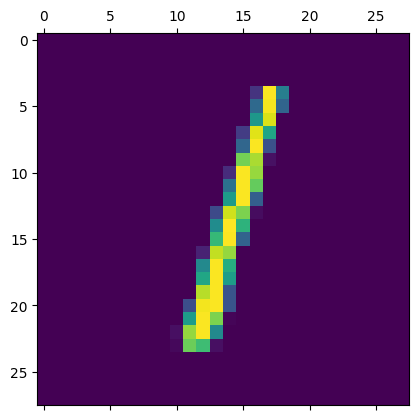

In [17]:
plt.matshow(X_test[2])

In [19]:
#print(X_test[2])
#test_flat = X_test[2].reshape(1,784)
#print(test_flat)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  38 254 109   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  84 254  63   0 

In [11]:
#code for how to test on single input
test = X_test_fs[0].reshape(1,784)
prediction = model.predict(test)
rez = np.argmax(prediction)
print(f'{rez}: confidence {prediction[0][rez]:.2f}')

1/1 [==============================] - 0s 28ms/step
7: confidence 1.00


In [12]:
model2 = keras.Sequential([
	keras.layers.Dense(100, input_shape=(784,), activation='relu'),
	keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

model2.fit(X_train_fs, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 575us/step - loss: 0.2719 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 1s 576us/step - loss: 0.1208 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 1s 572us/step - loss: 0.0849 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 1s 606us/step - loss: 0.0637 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 1s 616us/step - loss: 0.0502 - accuracy: 0.9842


In [13]:
model2.evaluate(X_test_fs, Y_test)

313/313 [==============================] - 0s 413us/step - loss: 0.0828 - accuracy: 0.9738


[0.0828351154923439, 0.973800003528595]

In [14]:
#save for python use
#model2.save('../model')

INFO:tensorflow:Assets written to: ../model/assets


In [15]:
#save for js use